In [57]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")


using cuda


In [58]:
import sklearn

from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                  noise= 0.03,
                  random_state=42)

X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [59]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "label": y} )

circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


(array([0.75424625, 0.23148074]), 1, (2,), ())

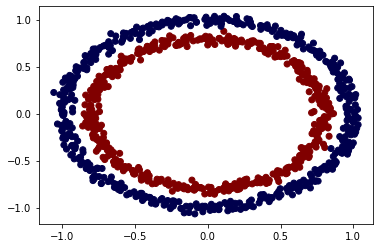

In [60]:
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0],
           y= X[:,1],
           c=y,
           cmap=plt.cm.seismic);

X.shape,y.shape

X

x_sample = X[0]
y_sample = y[0]

x_sample,y_sample,x_sample.shape,y_sample.shape

In [61]:
import torch
torch.__version__

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

type(X),X.dtype,y.dtype,X.shape,y.shape

(torch.Tensor,
 torch.float32,
 torch.float32,
 torch.Size([1000, 2]),
 torch.Size([1000]))

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                test_size=0.2,
                                                random_state=42)

len(X_train),len(X_test)


(800, 200)

In [63]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [64]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [65]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [66]:
from sklearn import datasets

torch.manual_seed(42)
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=5)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)


  def forward(self,x:torch.Tensor):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [67]:
device

'cuda'

In [68]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [69]:
model_0 = nn.Sequential(nn.Linear(in_features=2,out_features=5),
                        nn.Linear(in_features=5,out_features=1)).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [70]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

untrained_preds[:10],len(untrained_preds),untrained_preds.shape

(tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967],
         [ 0.2968],
         [ 0.1405],
         [ 0.2178],
         [ 0.0805],
         [-0.0284]], device='cuda:0'),
 200,
 torch.Size([200, 1]))

In [71]:
torch.round(untrained_preds[:10],decimals=2)

tensor([[-0.0300],
        [-0.0300],
        [ 0.0900],
        [-0.0700],
        [ 0.3000],
        [ 0.3000],
        [ 0.1400],
        [ 0.2200],
        [ 0.0800],
        [-0.0300]], device='cuda:0')

In [72]:
X_test[:10],len(X_test),X_test.shape

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 200,
 torch.Size([200, 2]))

In [73]:
y_test.shape,y_test[:10]

(torch.Size([200]), tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [74]:
###set up loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [75]:
#acc function

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/len(y_true)*100
  return acc
  # return correct

y_test.shape
y_pred = torch.ones(200)
y_pred
accuracy_fn(y_pred,y_test)


50.0

In [76]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [77]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [78]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [79]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [80]:
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [81]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels


tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [82]:
torch.eq(y_preds.squeeze(),y_pred_labels.squeeze())

tensor([True, True, True, True, True], device='cuda:0')

In [83]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [84]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

epochs =100

for epoch in range(epochs):
  model_0.train()

  #forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_test,test_pred)

  if epoch % 10 == 0:
    print(f'test_loss:{test_loss:.5f},test_acc:{test_acc:.2f}%,loss:{loss:.5f},acc:{acc:.5f}%')


test_loss:0.69440,test_acc:58.00%,loss:0.69796,acc:51.87500%
test_loss:0.69305,test_acc:53.00%,loss:0.69590,acc:51.25000%
test_loss:0.69254,test_acc:49.50%,loss:0.69490,acc:51.62500%
test_loss:0.69236,test_acc:49.50%,loss:0.69435,acc:51.12500%
test_loss:0.69232,test_acc:51.00%,loss:0.69401,acc:50.87500%
test_loss:0.69234,test_acc:50.00%,loss:0.69378,acc:50.25000%
test_loss:0.69239,test_acc:51.50%,loss:0.69362,acc:50.00000%
test_loss:0.69246,test_acc:51.00%,loss:0.69351,acc:50.25000%
test_loss:0.69254,test_acc:50.00%,loss:0.69342,acc:49.87500%
test_loss:0.69262,test_acc:53.00%,loss:0.69336,acc:49.87500%


In [85]:
import requests
from pathlib import Path


if Path("helper_function.py").is_file():
    print('file already exist')
else:
    response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    print('downloaded')
    with open("helper_function.py","wb") as f:
        f.write(response.content)


file already exist


In [86]:
####helper function.py rewrite practice
import numpy as np
def helper_func_test(model,X,y):
    model.to('cpu')
    X,y = X.to('cpu'), y.to('cpu')
    x_min, x_max = X[:,0].min(),X[:,0].max()
    y_min, y_max = X[:,1].min(),X[:,1].max()
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),np.linspace(y_min,y_max,10))
#     plt.plot(xx,yy,marker="o",color='k',linestyle='none')
    
    print(xx.shape)
    
    ###ravel() is same is reshape(-1)
    print(xx.ravel().shape)
    
    print(np.column_stack((xx.ravel(),yy.ravel())).shape)
    
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(),yy.ravel()))).float()
    
    print(X_to_pred_on)
    
    
    
    

helper_func_test(model_0,X,y)


(10, 10)
(100,)
(100, 2)
tensor([[-1.0595, -1.0678],
        [-0.8269, -1.0678],
        [-0.5943, -1.0678],
        [-0.3618, -1.0678],
        [-0.1292, -1.0678],
        [ 0.1034, -1.0678],
        [ 0.3360, -1.0678],
        [ 0.5686, -1.0678],
        [ 0.8011, -1.0678],
        [ 1.0337, -1.0678],
        [-1.0595, -0.8340],
        [-0.8269, -0.8340],
        [-0.5943, -0.8340],
        [-0.3618, -0.8340],
        [-0.1292, -0.8340],
        [ 0.1034, -0.8340],
        [ 0.3360, -0.8340],
        [ 0.5686, -0.8340],
        [ 0.8011, -0.8340],
        [ 1.0337, -0.8340],
        [-1.0595, -0.6003],
        [-0.8269, -0.6003],
        [-0.5943, -0.6003],
        [-0.3618, -0.6003],
        [-0.1292, -0.6003],
        [ 0.1034, -0.6003],
        [ 0.3360, -0.6003],
        [ 0.5686, -0.6003],
        [ 0.8011, -0.6003],
        [ 1.0337, -0.6003],
        [-1.0595, -0.3665],
        [-0.8269, -0.3665],
        [-0.5943, -0.3665],
        [-0.3618, -0.3665],
        [-0.1292, -0.36

In [87]:
a = torch.randn(4,4)
a

tensor([[ 1.9269,  1.4873,  0.9007, -2.1055],
        [ 0.6784, -1.2345, -0.0431, -1.6047],
        [-0.7521,  1.6487, -0.3925, -1.4036],
        [-0.7279, -0.5594, -0.7688,  0.7624]])

In [88]:
torch.argmax(a,dim=0)

tensor([0, 2, 0, 3])

In [89]:
b = torch.randn(2,3,4)
b

tensor([[[ 1.6423, -0.1596, -0.4974,  0.4396],
         [-0.7581,  1.0783,  0.8008,  1.6806],
         [ 0.0349,  0.3211,  1.5736, -0.8455]],

        [[ 1.3123,  0.6872, -1.0892, -0.3553],
         [-1.4181,  0.8963,  0.0499,  2.2667],
         [ 1.1790, -0.4345, -1.3864, -1.2862]]])

In [90]:
torch.argmax(b,dim=1)

tensor([[0, 1, 2, 1],
        [0, 1, 1, 1]])

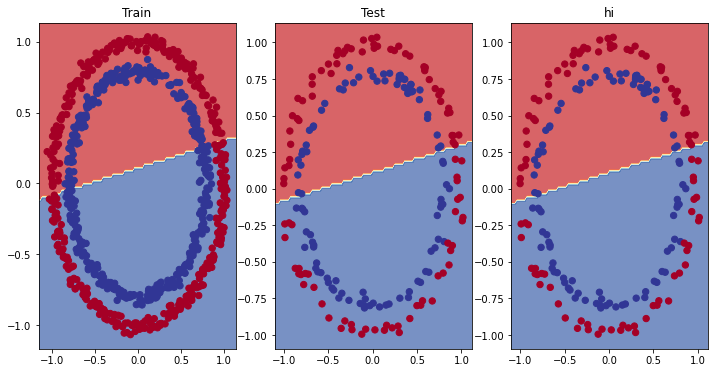

In [91]:
from helper_function import plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,3,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)
plt.subplot(1,3,3)
plt.title('hi')
plot_decision_boundary(model_0,X_test,y_test)

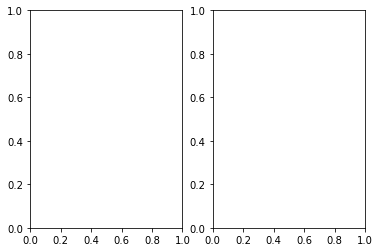

In [92]:
figs,ax = plt.subplots(1,2)

In [93]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [94]:
X_train.shape,y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [95]:
from sklearn import datasets

# torch.manual_seed(42)
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,out_features=10)  ##in_feature=2 because out X_train has 2features
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)  #out_feature =1 because y_train has 1 feature


  def forward(self,x:torch.Tensor):
    return self.layer_3(self.layer_2(self.layer_1(x)))



In [96]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [97]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826],
                      [ 0.2180, -0.2435],
                      [ 0.2167, -0.1473],
                      [ 0.5865, -0.4191],
                      [-0.4217, -0.4217],
                      [ 0.6360,  0.2356],
                      [ 0.6804, -0.5836],
                      [-0.7014, -0.5532]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4757,  0.2864,  0.2532,  0.5876, -0.3652, -0.4820,  0.3752, -0.2858,
                       0.4292, -0.1678], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1809, -0.2457, -0.1596,  0.0964,  0.0669, -0.0806,  0.1885,  0.2150,
                       -0.2293, -0.1688],
                      [ 0.2896, -0.1067, -0.1121, -0.3060, -0.1811,  0.0790, -0.0417, -0.2295,
                        0.0074, -0.2160],
                      [-0.2683, -0.174

In [98]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [99]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct/len(y_pred)*100
    return acc

In [100]:
epochs = 1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds =  torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_preds)
        
    if epoch % 100 == 0:
        print(f"loss:{loss:.5f}|acc:{acc:.2f}%|test_loss:{test_loss:.5f}|test_acc:{test_acc:.3f}%")
    
    

loss:0.69334|acc:50.50%|test_loss:0.69324|test_acc:45.000%
loss:0.69301|acc:50.50%|test_loss:0.69404|test_acc:45.500%
loss:0.69298|acc:51.38%|test_loss:0.69442|test_acc:45.500%
loss:0.69298|acc:51.25%|test_loss:0.69457|test_acc:45.500%
loss:0.69298|acc:51.00%|test_loss:0.69464|test_acc:45.500%
loss:0.69298|acc:51.00%|test_loss:0.69466|test_acc:45.500%
loss:0.69298|acc:51.00%|test_loss:0.69467|test_acc:46.000%
loss:0.69298|acc:51.00%|test_loss:0.69468|test_acc:46.000%
loss:0.69298|acc:51.00%|test_loss:0.69468|test_acc:46.000%
loss:0.69298|acc:51.00%|test_loss:0.69468|test_acc:46.000%


In [101]:
#creating new data 
weight = 0.7
bias = 0.3
X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = X*weight + bias

train_split = int(0.8*(len(X)))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

In [102]:
len(X_train),len(y_train),len(X_test),len(X_test)

(80, 80, 20, 20)

In [103]:
X.shape,y.shape


(torch.Size([100, 1]), torch.Size([100, 1]))

In [104]:
# from helper_function import plot_predictions
# plot_predictions(X_train,y_train,X_test,y_test)

In [105]:
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

In [106]:
model_2 = nn.Sequential(
                            nn.Linear(in_features=1,out_features=10),
                           nn.Linear(in_features=10,out_features=10),
                            nn.Linear(in_features=10,out_features=1)).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [107]:
# model_2.eval()
with torch.inference_mode():
    y_pred = model_2(X_test)
plot_predictions(X_train,y_train,X_test,y_test,predictions=y_pred)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_2.parameters(),
                           lr = 0.1)


In [ ]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    y_pred = model_2(X_train)
    
    loss = loss_fn(y_pred,y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():       
        test_pred = model_2(X_test)
        
        test_loss = loss_fn(test_pred,y_test)
        
    if epoch % 100 == 0:
        print(f"loss:{loss:.5f}|test_loss:{test_loss:.5f}")

In [ ]:
model_2.eval()
with torch.inference_mode():
    y_pred = model_2(X_test)
    
plot_predictions(X_train.cpu(),y_train,X_test,y_test,y_pred)

In [ ]:
##linear + non linear  using ReLu

import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

X,y = make_circles(n_samples=1000,
            noise=0.03,
            random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdBu)

In [ ]:
y_train.shape

In [ ]:
import pandas as pd

circles = pd.DataFrame({'x1':X[:,0],
                       'x2':X[:,1],
                       'y':y})

circles.head(10)

In [ ]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
        
model_3 = CircleModelV2().to(device)
model_3

In [ ]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = correct/len(y_true)*100
    return acc

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                           lr=0.1)

In [ ]:
y_logits = model_3(X_train)
test_logits = model_3(X_test)
y_logits.shape,test_logits.shape,y_train.shape,X_train.shape,y_test.shape,X_test.shape

In [ ]:
y_train.unsqueeze(dim=1).shape

In [ ]:
y_train.shape

In [ ]:
torch.manual_seed(42)
epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
test_logits = model_3(X_test)
test_pred = torch.round(torch.sigmoid(test_logits))

test_logits.shape,X_test.shape

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
    
y_preds[:10],y[:10]
f'{accuracy_fn(y_test,y_preds)}%'

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
plt.figure(figsize=(5,6))
plt.subplot(2,1,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(2,1,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

In [ ]:
preds = torch.randn(10,5)
a = torch.rand(10,).reshape(5,2)
# target = torch.randint(10,a)
a

In [ ]:
preds

In [ ]:
a = torch.randn(2,2,3,4) ##returns total number of elements in the input tensor
a.numel()

In [ ]:
len(a)  ##not the same

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 

In [ ]:
Accuracy()
